In [2]:
import numpy as np
from sklearn.decomposition import PCA, FastICA
import matplotlib.pyplot as plt

In [3]:
seed = 42
rng = np.random.default_rng(seed)
noise_scale = 1
t = np.linspace(0, 10, 1000)
eta =  noise_scale * rng.normal(0, 1, (3, len(t)))

In [4]:
# Generate data (1000 values for every function)
f1 = np.sin(t) + 0.001 * eta[0]
f2 = 2 * (t - np.floor(t)) + 0.002 * eta[1]
f3 = 0.01 * t + 0.001 * eta[2]

F = np.vstack((f1, f2, f3))

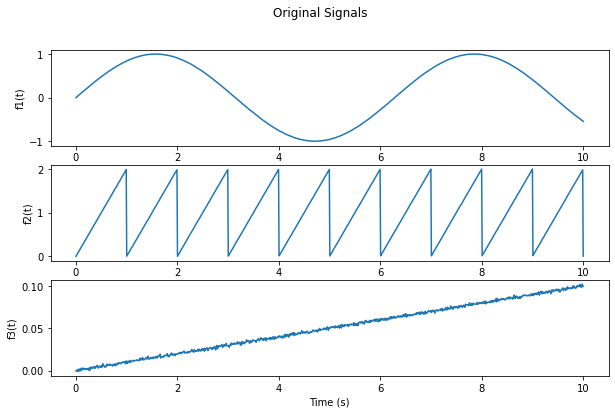

In [5]:
# Plot the original signals
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(t, F[0])
plt.ylabel('f1(t)')
plt.subplot(3, 1, 2)
plt.plot(t, F[1])
plt.ylabel('f2(t)')
plt.subplot(3, 1, 3)
plt.plot(t, F[2])
plt.ylabel('f3(t)')
plt.xlabel('Time (s)')
plt.suptitle('Original Signals')

plt.show()

In [6]:
A = rng.random((3, 3))

X = np.dot(A, F)

In [7]:
# PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [8]:
# ICA
ica = FastICA(n_components=3, whiten='unit-variance')
X_ica = ica.fit_transform(X)

In [9]:
# Reconstructed signals
F_PCA = pca.inverse_transform(X_pca)
F_ICA = ica.inverse_transform(X_ica)

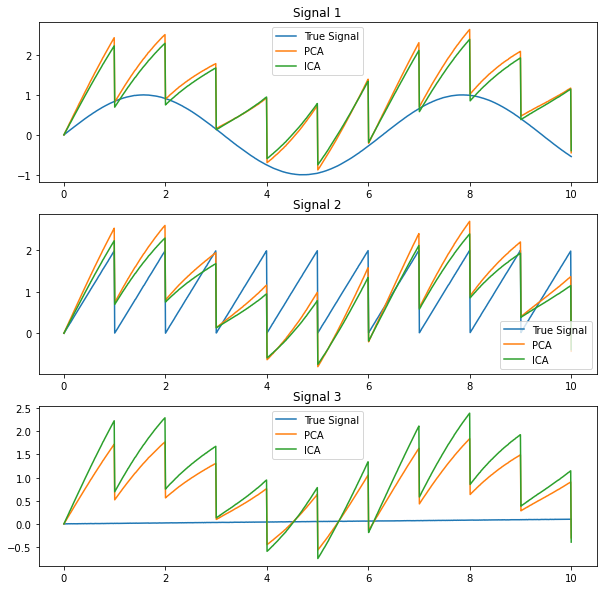

In [10]:
# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 10))
for i in range(3):
  axs[i].plot(t, F[i], label='True Signal')
  axs[i].plot(t, F_PCA[i], label='PCA')
  axs[i].plot(t, F_ICA[i], label='ICA')
  axs[i].set_title(f'Signal {i+1}')
  axs[i].legend()

In [11]:
# Average signal reconstruction error
err_pca = np.mean((F - F_PCA)**2)
err_ica = np.mean((F - F_ICA)**2)

print(f'PCA reconstruction error: {err_pca:0.4f}')
print(f'ICA reconstruction error: {err_ica:0.4f}')

PCA reconstruction error: 0.6774
ICA reconstruction error: 0.8031


In [12]:
# Signal reconstruction error for each signal
for i in range(3):
  err_pca = np.mean((F[i] - F_PCA[i])**2)
  err_ica = np.mean((F[i] - F_ICA[i])**2)
  print(f'PCA reconstruction error for signal {i+1}: {err_pca:0.4f}')
  print(f'ICA reconstruction error for signal {i+1}: {err_ica:0.4f}')
  print()

PCA reconstruction error for signal 1: 0.9375
ICA reconstruction error for signal 1: 0.8039

PCA reconstruction error for signal 2: 0.3451
ICA reconstruction error for signal 2: 0.3151

PCA reconstruction error for signal 3: 0.7497
ICA reconstruction error for signal 3: 1.2902



Results:

Both PCA and ICA mostly fail to recreate the individual signals (except for signal 2, which is better recognizable than signal 1 and 3), which can be seen from looking at the signal reconstruction error (mean-squared-error) for all 3 signals where the error is more than twice as small for signal 2 as compared to signal 1 and 3.
When comparing the two methods, it seems that in this case PCA does a better job at recreating the signals than ICA, which can be seen from the mean of the reconstruction error over all three signals, which is smaller for PCA.
This also holds true, when increasing the noise: While the errors increase, PCA remains better than ICA, and signal 2 generally has the smallest signal reconstruction error.